In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 한글 시각화

In [20]:
from matplotlib import font_manager, rc
font_path = '/Windows/Fonts/NanumGothic.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [6]:
df = pd.read_csv('seoul_apart.csv')
df.head()

,지역명,법정동,거래일,아파트,전용면적,층,건축년도,거래금액
0,서울시 종로구,내수동,2018-01-13,경희궁의아침2단지,140.78,15,2004,130000
1,서울시 종로구,내수동,2018-01-19,경희궁 파크팰리스,103.77,5,2003,96000
2,서울시 종로구,내수동,2018-01-23,경희궁의아침3단지,123.13,10,2004,118000
3,서울시 종로구,내수동,2018-01-30,세종로대우,66.96,13,1994,54500
4,서울시 종로구,내수동,2018-01-31,세종로대우,76.66,11,1994,64000


In [7]:
df = pd.read_csv('Apart Deal.csv')
df.head()

C:\Users\82106\AppData\Local\Temp\ipykernel_20968\3099730040.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Apart Deal.csv')


,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630188 entries, 0 to 630187
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   지역명     630188 non-null  object 
 1   법정동     630188 non-null  object 
 2   거래일     630188 non-null  object 
 3   아파트     630188 non-null  object 
 4   전용면적    630188 non-null  float64
 5   층       630188 non-null  int64  
 6   건축년도    630188 non-null  int64  
 7   거래금액    630188 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 38.5+ MB


In [5]:
df.describe()

,전용면적,층,건축년도,거래금액
count,630188.000000,630188.000000,630188.000000,6.301880e+05
mean,77.841630,9.066753,1999.783972,6.729948e+04
std,30.265831,6.120127,9.698824,5.230922e+04
min,10.156000,1.000000,1961.000000,7.000000e+02
25%,59.720000,4.000000,1993.000000,3.650000e+04
50%,83.700000,8.000000,2000.000000,5.290000e+04
75%,84.970000,13.000000,2006.000000,8.050000e+04
max,424.320000,69.000000,2023.000000,1.450000e+06


In [6]:
df[['지역명', '법정동']].describe()

,지역명,법정동
count,630188,630188
unique,25,333
top,서울시 노원구,상계동
freq,61866,24230


### numeric 시각화

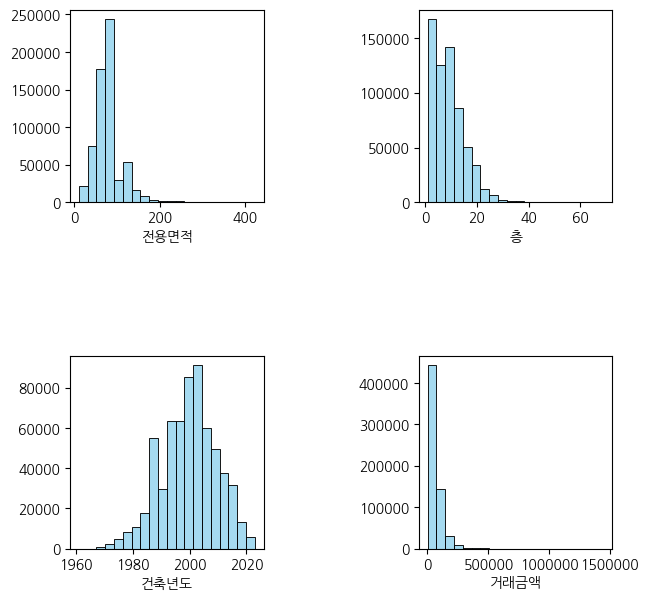

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))
plt.subplots_adjust(wspace=0.8, hspace=0.8)

numeric = ['전용면적','층','건축년도','거래금액']

for i, cat in enumerate(numeric):
    sns.histplot(df[cat], bins=20, color='skyblue', ax=axs[int(i/2), i%2]).set_ylabel("")    

plt.ticklabel_format(style='plain', axis='x')

plt.show()

### object 시각화

In [10]:
df.groupby('법정동').size().reset_index(name='갯수').sort_values(by='갯수', ascending=False).head(10)

,법정동,갯수
138,상계동,24230
268,중계동,14025
185,신정동,13135
19,구로동,12578
275,창동,11667
122,봉천동,11406
97,목동,9506
240,월계동,9394
14,공릉동,8468
321,화곡동,8352


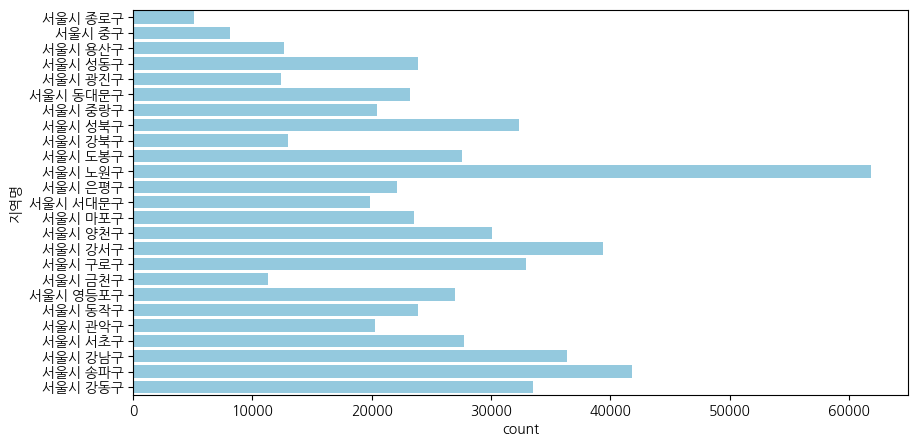

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(y='지역명', data=df, color='skyblue')
plt.show()

### 년도별 거래 횟수 시각화

C:\Users\82106\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


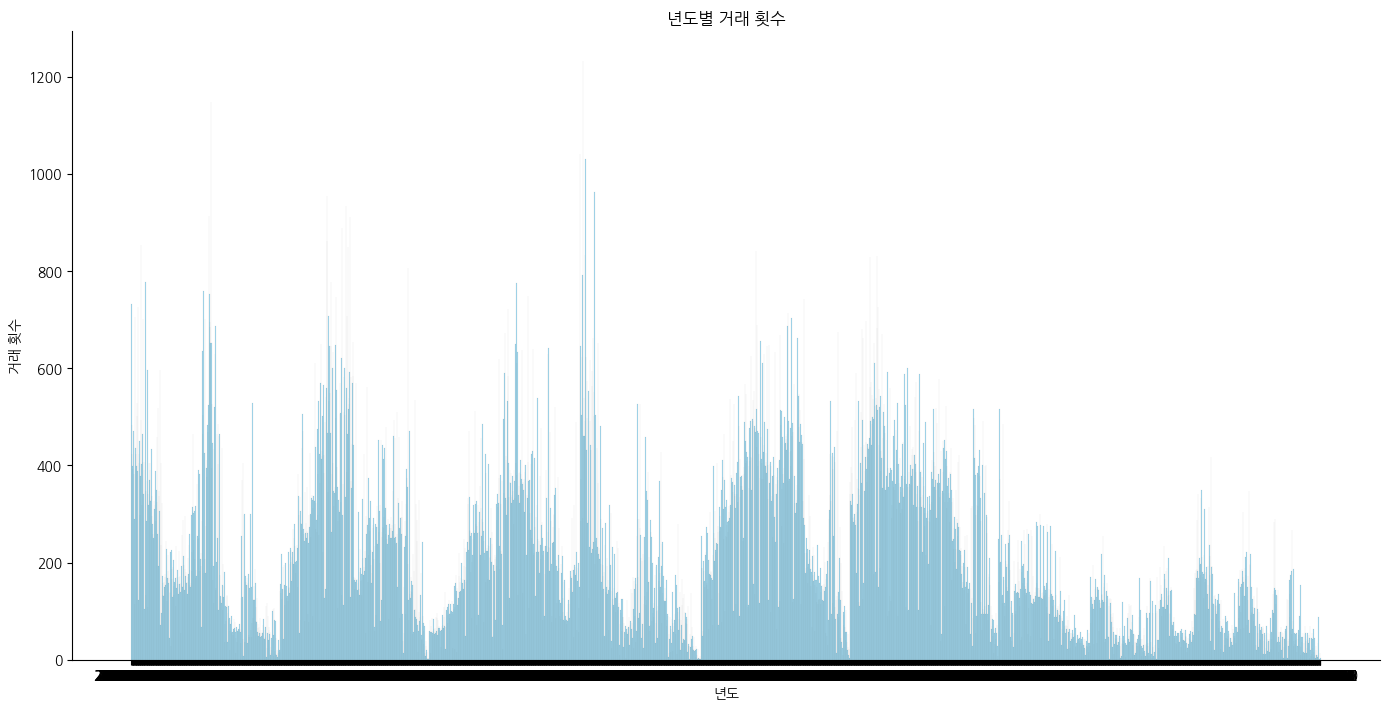

In [12]:
sns.displot(df, x='거래일',color='skyblue',height=7, aspect=2, discrete=True)
plt.title('년도별 거래 횟수')
plt.xlabel('년도')
plt.ylabel('거래 횟수')
plt.show()

### 년도별 거래금액 합계 시각화

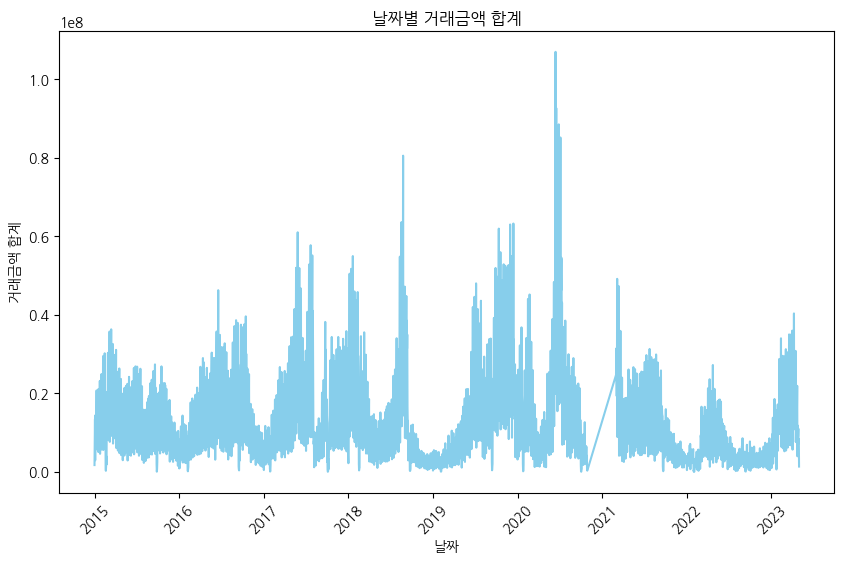

In [13]:
df['거래일'] = pd.to_datetime(df['거래일'])

# 날짜를 기준으로 그룹화하고 거래금액을 합산
grouped_df = df.groupby('거래일')['거래금액'].sum().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(x='거래일', y='거래금액',color='skyblue', data=grouped_df)
plt.title('날짜별 거래금액 합계')
plt.xlabel('날짜')
plt.ylabel('거래금액 합계')
plt.xticks(rotation=45)
plt.show()

### 지역별 면적 대비 가격 합계 구해보기

In [14]:
df1 = df.copy()

In [15]:
df1['면적대비 가격'] = df1['거래금액'] / df1['전용면적']
df1

,지역명,법정동,거래일,아파트,전용면적,층,건축년도,거래금액,면적대비 가격
0,서울시 종로구,내수동,2018-01-13,경희궁의아침2단지,140.78,15,2004,130000,923.426623
1,서울시 종로구,내수동,2018-01-19,경희궁 파크팰리스,103.77,5,2003,96000,925.122868
2,서울시 종로구,내수동,2018-01-23,경희궁의아침3단지,123.13,10,2004,118000,958.336717
3,서울시 종로구,내수동,2018-01-30,세종로대우,66.96,13,1994,54500,813.918757
4,서울시 종로구,내수동,2018-01-31,세종로대우,76.66,11,1994,64000,834.855205
...,...,...,...,...,...,...,...,...,...
630183,서울시 강동구,강일동,2023-04-16,강동리버스트4단지,49.82,7,2020,60000,1204.335608
630184,서울시 강동구,강일동,2023-04-20,강일리버파크4단지,84.83,5,2009,86000,1013.792290
630185,서울시 강동구,강일동,2023-04-21,강일리버파크6단지,84.53,8,2009,85000,1005.560156
630186,서울시 강동구,강일동,2023-04-22,강일리버파크3단지,84.53,8,2009,84000,993.730037


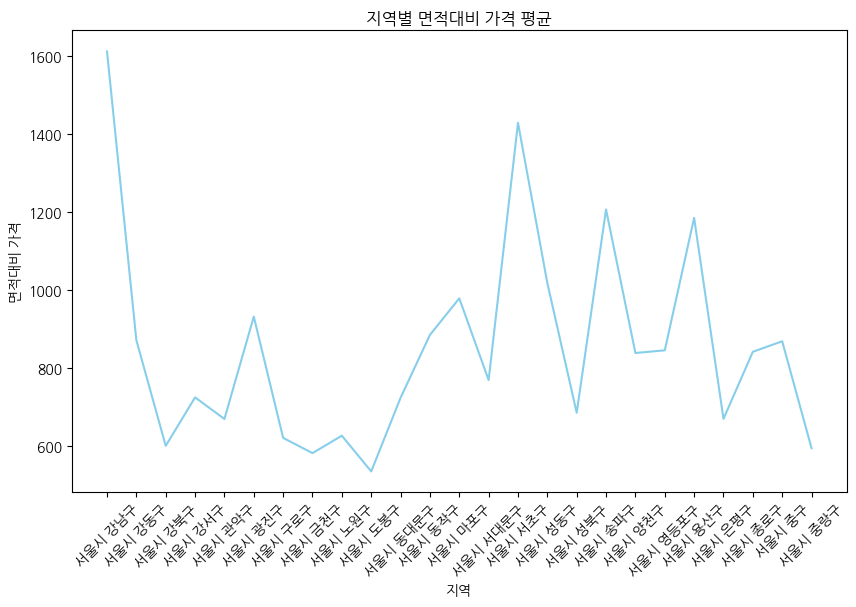

In [21]:
# 날짜를 기준으로 그룹화하고 거래금액을 합산
grouped_df1 = df1.groupby('지역명')['면적대비 가격'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(x='지역명', y='면적대비 가격',color='skyblue', data=grouped_df1)
plt.title('지역별 면적대비 가격 평균')
plt.xlabel('지역')
plt.ylabel('면적대비 가격')
plt.xticks(rotation=45)
plt.show()